In [226]:
import requests
import json
from contextlib import closing
# make base URL and dictionary of get request key/values
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'parliament', 'show-blocks':'body', 
           'page-size': 50, 'show-tags': 'contributor'} # key/values for get request (look up in api, there are lots)

# Perform the actual request
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results'] if x['tags']]
# print(summaries)
# summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results']]
# print(len(summaries))
# # print(len([word for document in summaries for word in summaries[0].split()]))
words = [word for document in summaries for word in document.split()]
print(words)
print(len(words))

['An', 'ally', 'of', 'the', 'former', 'Italian', 'prime', 'minister', 'Silvio', 'Berlusconi', 'has', 'been', 'elected', 'president', 'of', 'the', 'European', 'parliament', 'after', 'a', 'deal', 'was', 'struck', 'between', 'two', 'of', 'the', 'institution’s', 'largest', 'political', 'groups,', 'consolidating', 'a', 'conservative', 'grip', 'on', 'key', 'European', 'Union', 'institutions.', 'Antonio', 'Tajani,', 'who', 'has', 'been', 'elected', 'as', 'an', 'MEP', 'four', 'times', 'and', 'was', 'previously', 'a', 'vice-president', 'of', 'the', 'European', 'parliament,', 'beat', 'the', 'centre-left', 'leader', 'and', 'fellow', 'Italian', 'Gianni', 'Pittella', 'by', '351', 'votes', 'to', '282', 'in', 'a', 'rare', 'fourth-round', 'runoff,', 'contrary', 'to', 'past', 'appointments', 'decided', 'by', 'mainstream', 'parties', 'before', 'the', 'voting.', 'Tajani’s', 'victory', 'followed', 'a', 'pact', 'between', 'his', 'centre-right', 'group', 'and', 'the', 'liberals,', 'led', 'by', 'the', 'Brexi

In [227]:
doc_lengths = []
for document in summaries:
    length = 0
    for word in document.split():
        length += 1
    doc_lengths.append(length)
doc_lengths

[610,
 948,
 715,
 640,
 315,
 496,
 390,
 1043,
 521,
 333,
 703,
 816,
 455,
 460,
 775,
 620,
 129,
 1272,
 698,
 733,
 913,
 716,
 455,
 967,
 555,
 953,
 301,
 724,
 388,
 489,
 394,
 735,
 780,
 182,
 1072,
 810,
 716,
 834,
 815,
 782,
 926,
 1484,
 1080,
 799,
 1057,
 1311]

In [228]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

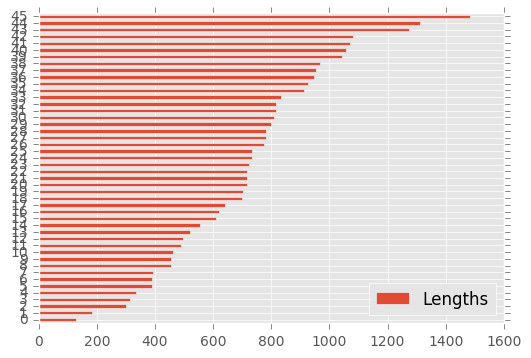

In [229]:
import pandas as pd
doc_lengths.sort()
df = pd.DataFrame({'Lengths': doc_lengths})
plt.style.use('ggplot')
labels = list(range(0,10))
ax = df.plot(kind="barh",yticks=labels)

#ax.set_yticklabels(list(range(0,50)))

In [230]:
num = list(range(0,50))
print(num)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [231]:
# combined stop words from scikit-Learn's original source and 2 others, for 617 stop words
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py
# https://sites.google.com/site/kevinbouge/stopwords-lists
# http://algs4.cs.princeton.edu/35applications/stopwords.txt
with open("combined_stop_words.txt") as textfile:
    stopwords = textfile.readlines()
    stopwords = [word.strip() for word in stopwords]

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stopwords)
# count_vect = CountVectorizer(stop_words=stopwords,
#                               max_df=0.01,
#                               min_df=4)
bag = count_vect.fit_transform(summaries)
pd.options.display.max_columns = 999
df = pd.DataFrame(data=bag.toarray(),columns=count_vect.get_feature_names())
df

,000,10,100,101,10b,10km,11,114,11th,12,122,13,13bn,14,15,16,163,17,173,18,189,19,1903,1912,1950s,1958,1972,1980s,1982,1990s,1994,1996,19th,1bn,20,2004,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2019,2029,20bn,217,220bn,23,24,25,25bn,25s,26,27,28,282,28bn,2bn,2gb,30,300,300m,30am,31,32,333,34,35,351,36,360bn,37,372,40,42,430,440,45,450,45bn,46,47,48,4bn,50,500,500m,50s,51,52,52bn,53,54,55,550,55zf,59,5bn,60,600,60bn,62,620,63,65s,66,68,6bn,70,73,751,80,80s,90,90s,96,9bn,aback,abandon,abandoned,abbotsbury,abbott,abc,abcc,abdul,aberdeen,aberdeenshire,ability,abolish,abseiled,abseilers,absence,absolute,absolutely,abstained,absurd,abuse,abused,abuses,academia,accept,acceptable,accepted,accepting,access,accessed,accession,accommodate,accommodating,accommodation,accord,accordance,account,accountable,accounts,accreditation,accredited,accusations,accused,accusing,accustomed,acknowledge,acknowledged,acquire,act,acting,action,actions,activate,activating,actively,activist,activists,actu,acute,adam,add,added,adding,address,addressed,addresses,addressing,adequate,adjourns,administration,administrations,administrative,admission,admitted,admittedly,adolf,adopt,adopted,adopting,adoption,adults,advance,advertised,advice,advise,advised,adviser,advisers,advises,advocate,aerospace,affair,affairs,affected,affects,affiliated,affiliation,afforded,afghan,afraid,aftermath,afternoon,ag,age,agence,agencies,agency,agent,ago,agree,agreed,agreement,agriculture,ags,ahead,ahmed,aide,aides,aim,aimed,aims,air,airports,ak,akin,alain,alan,alarm,alas,alde,alec,alex,alia,aligned,aligning,alike,allegation,allegations,alleged,allegedly,allegiance,allen,alliance,allies,allowances,allowed,allowing,ally,alongside,alp,altante,alter,alternative,amassed,ambassador,ambition,amend,amended,amendment,amendments,america,american,amid,amounting,amounts,amused,analyse,analysis,andrew,andrews,angela,anger,angered,angering,angry,anguish,anna,anne,announce,announced,announcement,announcing,annoyance,annoyed,ansa,answer,antagonism,anthony,anti,antonio,anxieties,anxiety,anxious,anymore,apec,apologise,apologised,apparent,appeal,appeals,appeared,appears,appetite,applauded,applause,applicable,apply,appoint,appointed,appointment,appointments,appose,approach,approached,appropriately,appropriateness,approval,approve,approved,april,arab,archaic,arcy,area,areas,argue,argued,arguing,argument,arise,arm,arms,army,arose,arrange,arrangement,arrangements,arrivals,arrive,art,article,articles,arts,asean,ashdown,asia,asian,asked,aspect,aspects,assault,assembled,assemblies,assembly,assert,asserted,assessment,assets,assist,assistant,assisting,association,assumed,assumption,assurances,asylum,atlante,atmosphere,ato,attaching,attack,attacked,attacks,attempt,attempted,attempting,attempts,attend,attended,attending,attention,attire,attitude,attorney,attract,attractive,august,aussie,austerity,australia,australian,australians,author,authorisation,authorise,authorising,authoritarian,authorities,authority,auto,automatic,automatically,autonomous,autonomy,autumn,av,average,avoid,awaited,awards,aware,awful,axe,ay,aylin,ayrshire,azizi,baby,backbench,backbenchers,backbenches,backed,backer,backers,background,backing,backlash,backlog,backpacker,backpackers,backroom,backstop,bad,badly,baggio,baggy,bailing,bailout,balance,balanced,balances,ballot,ballots,balmedie,balmoral,bambang,bamiyan,ban,bandied,bank,banking,banks,banned,banner,banners,banning,banquet,bar,barack,barbecue,bargain,barged,bark,barked,barnaby,barnier,barrier,barring,barrister,based,basement,basically,basin,basis,battlefield,bavaria,bbc,...,tabled,tabloids,taboo,tackled,tajani,takes,taking,taliban,talk,talking,talks,tame,taming,tangible,tank,targeted,targeting,tariff,task,tasmania,tasmanian,tasmina,taunts,tax,taxation,taxes,taxpayer,taxpayers,tayyip,teachers,teaches,team,teams,tear,tease,technical,technology,ted,teenage,televised,television,tellers,telling,tells,temple,temporarily,tempting,tens,tension,tensions,terence,term,terms,terrain,

/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


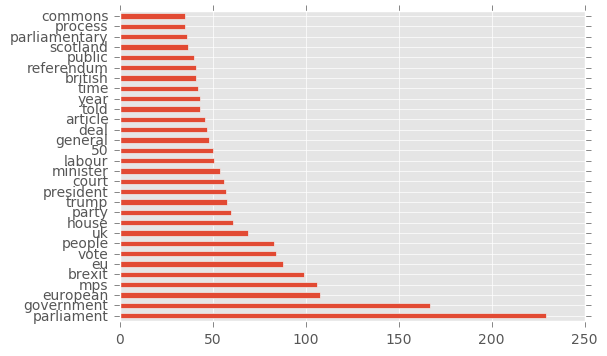

In [233]:
frequencies = df.sum()
# len(frequencies)
# total = 0
# for word in frequencies:
#     total += word
# print(total)

frequencies.sort(inplace=True)
largest = frequencies.nlargest(30)
largest.plot(kind = "barh")


In [241]:
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'brexit', 'show-blocks':'body', 
           'page-size': 150, 'show-tags': 'contributor' } # key/values for get request (look up in api, there are lots)

In [242]:
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['sectionId'] for x in articles['response']['results']]
# print(summaries)
# summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results']]
# print(len(summaries))
# # print(len([word for document in summaries for word in summaries[0].split()]))
words = [word for document in summaries for word in document.split()]
words_no_dup = list(set(words))
print(words)
print(len(words_no_dup))

['politics', 'politics', 'politics', 'politics', 'politics', 'politics', 'politics', 'politics', 'politics', 'world', 'politics', 'voluntary-sector-network', 'politics', 'politics', 'politics', 'politics', 'uk-news', 'environment', 'politics', 'business', 'politics', 'politics', 'politics', 'politics', 'politics', 'politics', 'politics', 'law', 'politics', 'politics', 'world', 'artanddesign', 'politics', 'commentisfree', 'politics', 'politics', 'info', 'tv-and-radio', 'politics', 'politics', 'lifeandstyle', 'us-news', 'politics', 'politics', 'politics', 'global', 'commentisfree', 'politics', 'stage', 'commentisfree', 'politics', 'higher-education-network', 'politics', 'politics', 'commentisfree', 'politics', 'education', 'uk-news', 'politics', 'politics', 'politics', 'uk-news', 'uk-news', 'politics', 'business', 'politics', 'politics', 'business', 'politics', 'politics', 'commentisfree', 'uk-news', 'stage', 'money', 'politics', 'politics', 'environment', 'politics', 'politics', 'suez-c

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer(stop_words=stopwords)

tfidf_mat = tfidf_vect.fit_transform(summaries) 
# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df

,artanddesign,books,business,circular,commentisfree,economy,education,environment,fashion,global,higher,info,law,lifeandstyle,media,money,network,news,politics,radio,sector,small,society,stage,suez,technology,tv,uk,voluntary,world,zone
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0


In [244]:
most_common_rel_words = df.sum()

/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


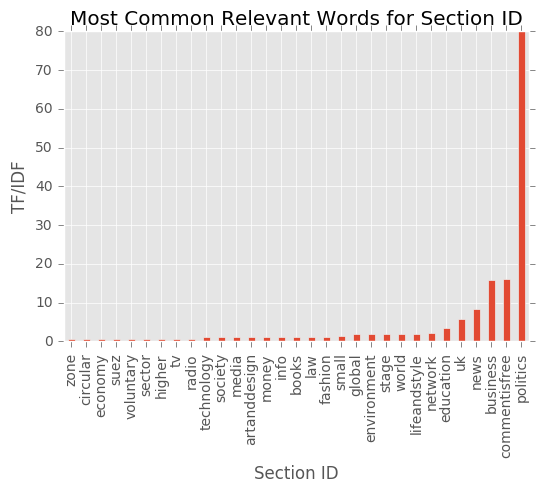

In [245]:
plt.style.use('ggplot')
most_common_rel_words.sort(inplace=True)
ax = most_common_rel_words.plot(kind = 'bar')
plt.title("Most Common Relevant Words for Section ID")
plt.ylabel("TF/IDF")
plt.xlabel("Section ID")


In [246]:
df = pd.DataFrame({'Section IDs': words})
df_grouped = df.groupby(by='Section IDs')
df
# plt.style.use('ggplot')
#df_grouped.plot(kind="bar")

,Section IDs
0,politics
1,politics
2,politics
3,politics
4,politics
5,politics
6,politics
7,politics
8,politics
9,world


['commentisfree', 'suez-circular-economy-zone', 'tv-and-radio', 'politics', 'global', 'media', 'fashion', 'technology', 'info', 'education', 'books', 'environment', 'business', 'money', 'world', 'uk-news', 'law', 'society', 'higher-education-network', 'lifeandstyle', 'us-news', 'small-business-network', 'voluntary-sector-network', 'stage', 'artanddesign']


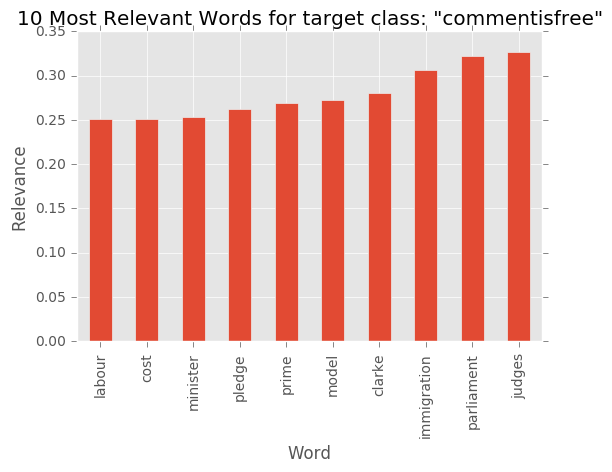

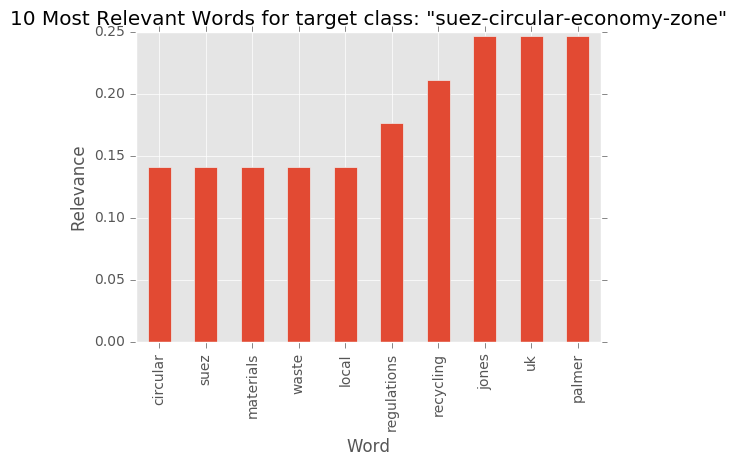

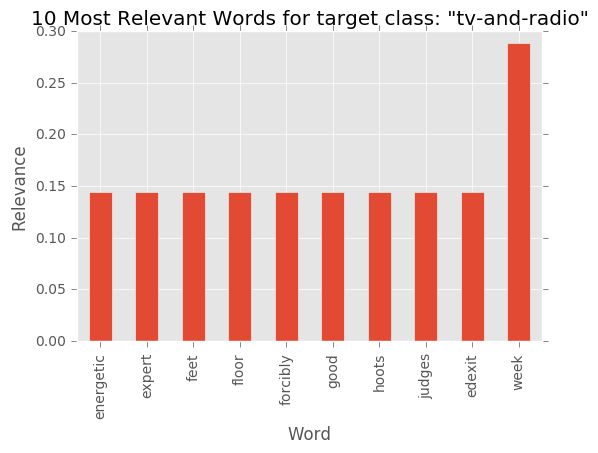

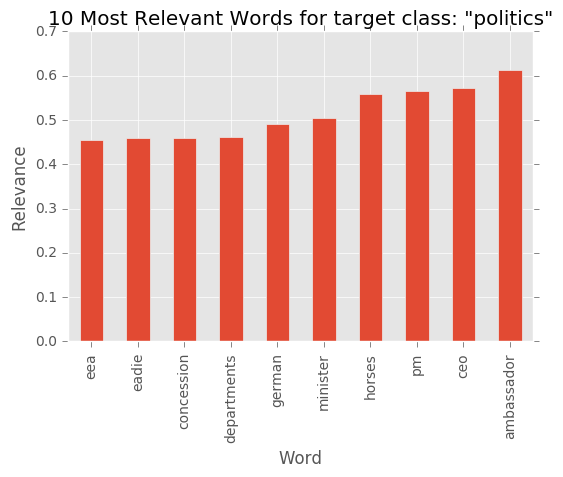

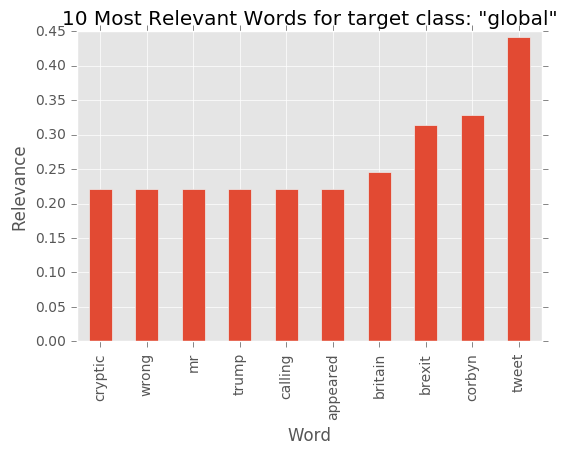

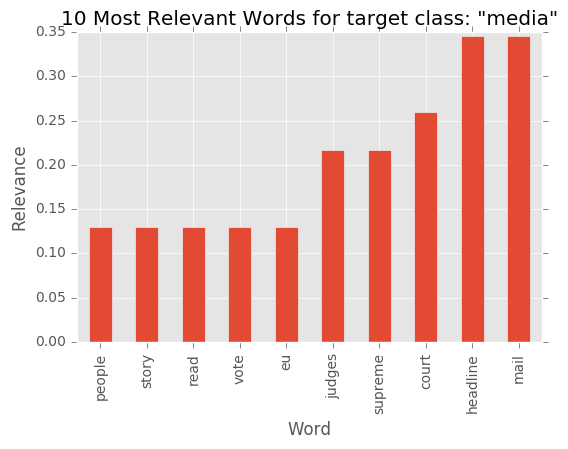

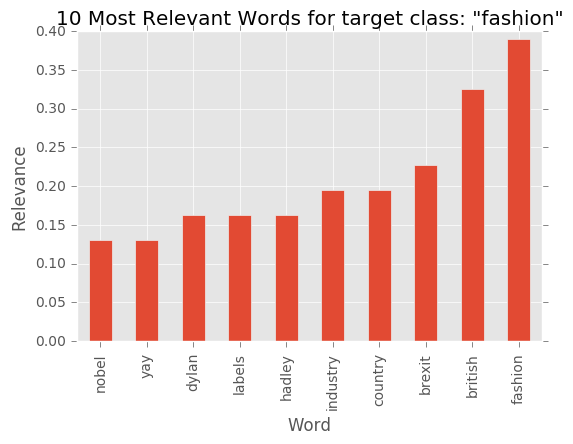

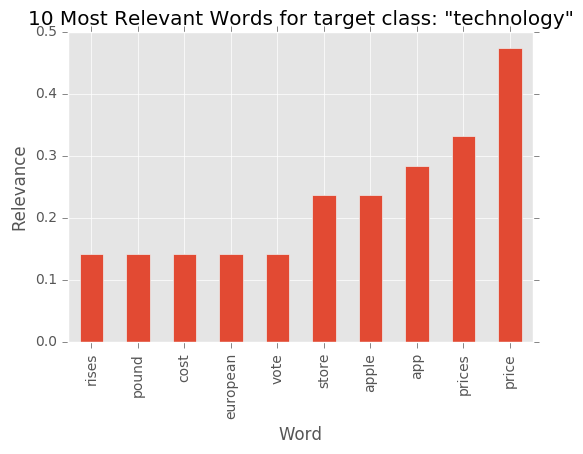

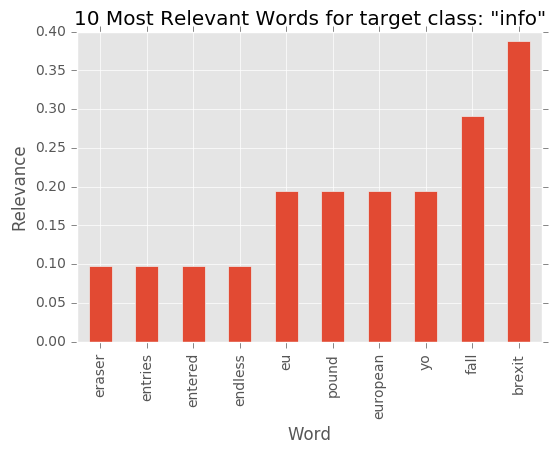

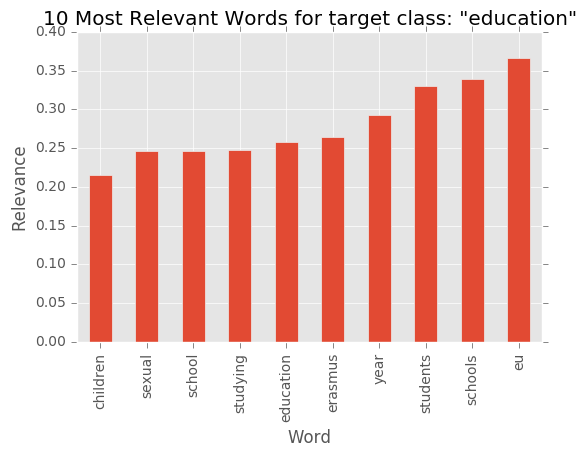

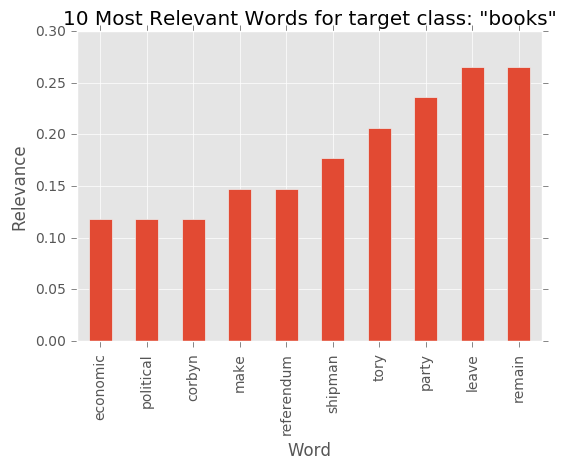

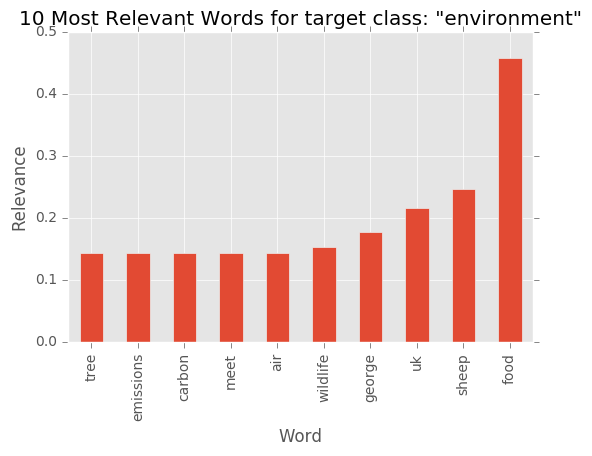

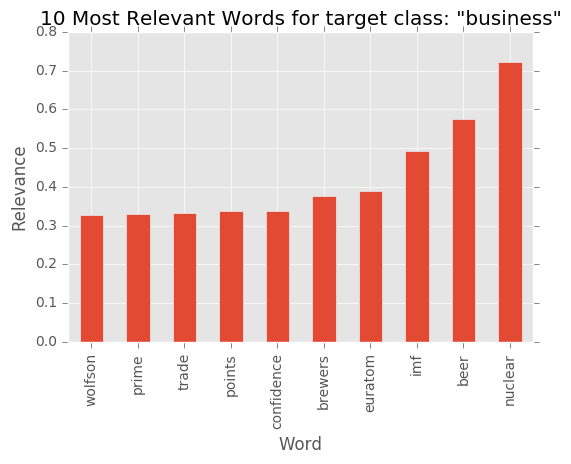

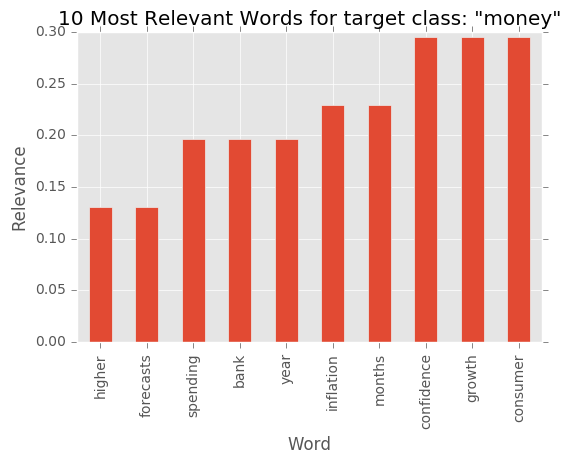

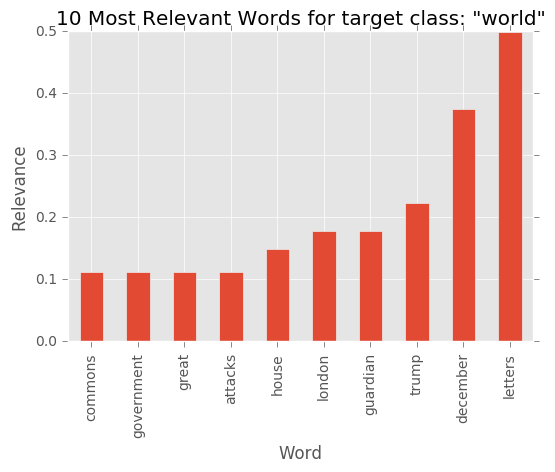

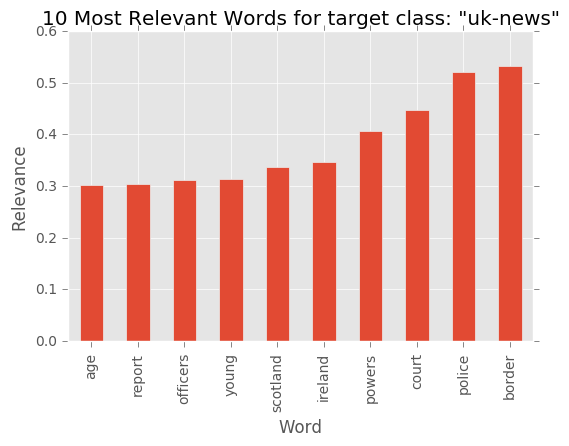

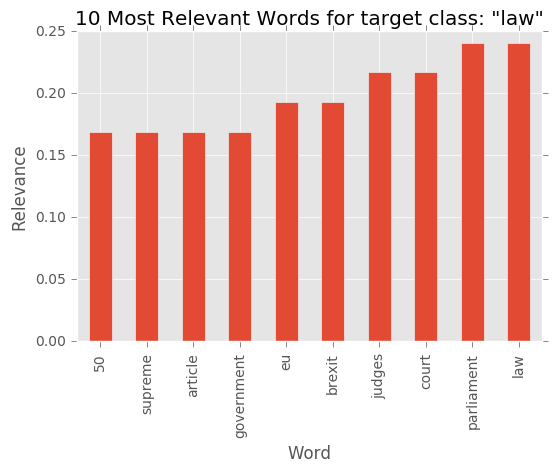

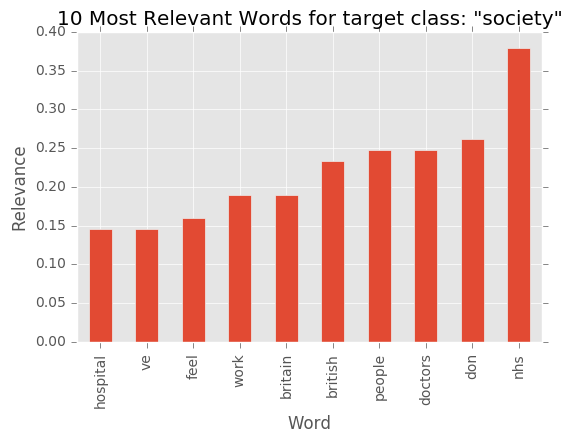

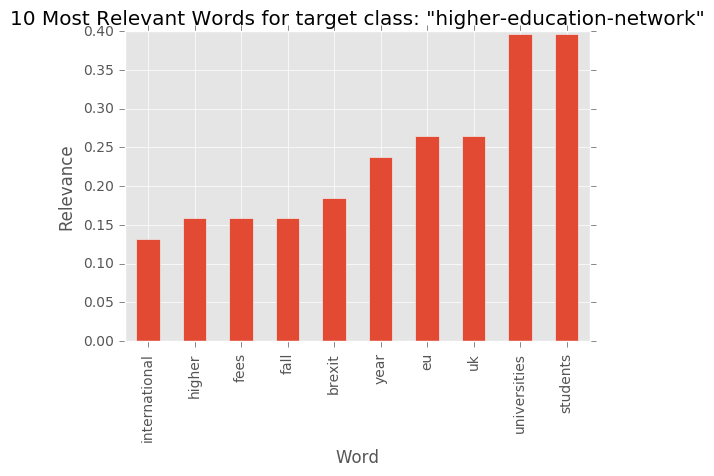

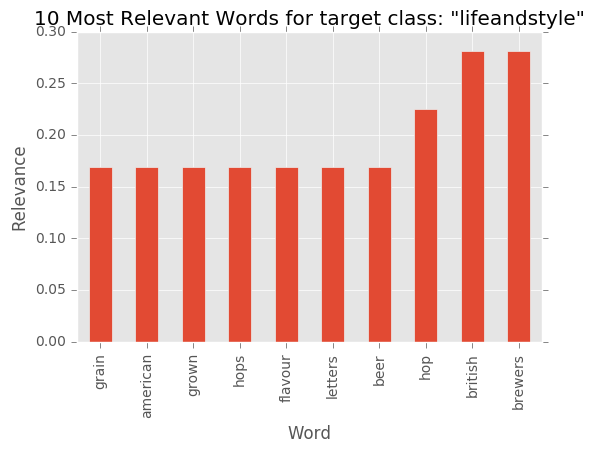

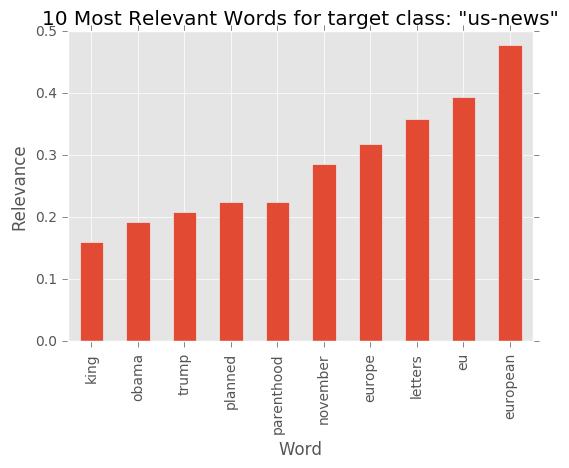

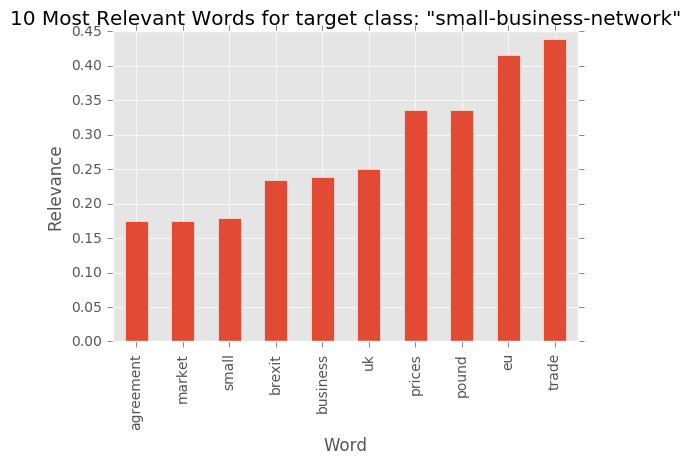

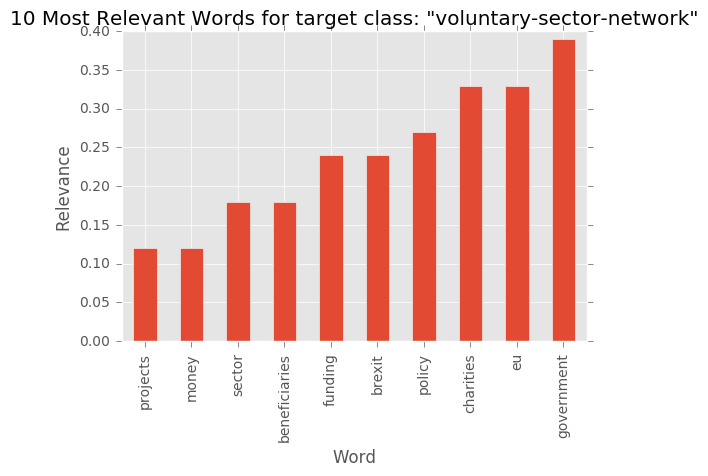

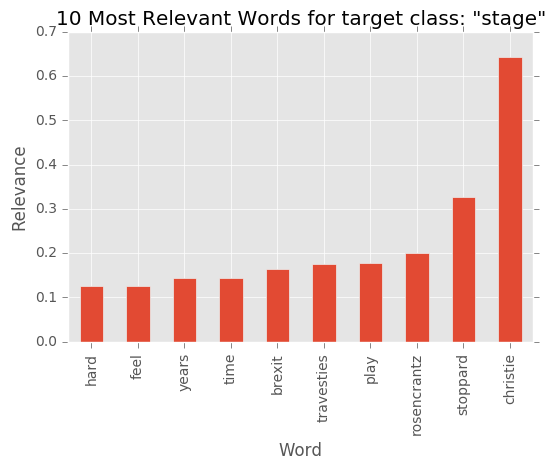

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [247]:
# url = "https://content.guardianapis.com/search"
# payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'brexit', 'show-blocks':'body', 
#            'page-size': 50, 'show-tags': 'contributor' } # key/values for get request (look up in api, there are lots)
# with closing(requests.get(url,params=payload)) as r:
#     articles = r.json()
#     #print(articles)

#fig, axs = plt.subplots(2,3)

words_no_dup1 = ["business"]
ctr = 0
# for topic in words_no_dup: 
#     summaries = []
#     docs = 0
#     print(topic)
#     for x in articles['response']['results']:
#         if x['sectionId']== topic:
#             summaries.append(x['blocks']['body'][0]['bodyTextSummary'])
#             docs += 1
#     if docs > 1:
#         print("IN")
#         tfidf_vect = TfidfVectorizer(stop_words=stopwords)
#         tfidf_mat = tfidf_vect.fit_transform(summaries) 
#         ab = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
#         plt.clf()
#         plt.figure()
#         ab.plot(legend=False, ax=axs[ctr])
#         ctr+=1

docs = 0
print(words_no_dup)
for topic in words_no_dup:
    summaries = []
    for x in articles['response']['results']:
        if x['sectionId']== topic:
            summaries.append(x['blocks']['body'][0]['bodyTextSummary'])
            docs += 1
    ctr+=1
    tfidf_vect = TfidfVectorizer(stop_words=stopwords)
    tfidf_mat = tfidf_vect.fit_transform(summaries) 
    df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
    df_top_10_tfidf = df.max().sort_values()[-10:]
    axis = df_top_10_tfidf.plot(kind='bar', title="10 Most Relevant Words for target class: \"" + topic +"\"")
    axis.set_xlabel("Word")
    axis.set_ylabel("Relevance")
    plt.show()

# print(summaries)
# summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results']]
# print(len(summaries))
# # print(len([word for document in summaries for word in summaries[0].split()]))

# words = [word for document in summaries for word in document.split()]
# words_no_dup = list(set(words))
# print(words)
# print(len(words_no_dup))